In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [0]:
sc = SparkContext()
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

In [0]:
infile = "s3://srifinal007/lat_longs.txt"

d1 = sc.textFile(infile)
d2 = d1.map(lambda x: x.split(" "))
d3 = d2.map(lambda x:(float(x[0]),float(x[1]),x[2]))

In [0]:
all_data = d3.collect()
import pandas as pd
all_data = pd.DataFrame(all_data,columns=['Latitude','Longtitude','Site'])
all_data.head()

,Latitude,Longtitude,Site
0,36.700000,3.216667,<http://dbpedia.org/resource/Algeria>
1,42.500000,1.516667,<http://dbpedia.org/resource/Andorra>
2,12.516667,-70.033333,<http://dbpedia.org/resource/Aruba>
3,-8.833333,13.333333,<http://dbpedia.org/resource/Angola>
4,41.333333,19.800000,<http://dbpedia.org/resource/Albania>


In [0]:
#us lat and long range

lat_upper_limit = 64.85694
lat_lower_limit = 19.50139
lon_upper_limit = -161.75583
lon_lower_limit = -68.01197

In [0]:
us = all_data[(all_data.Longtitude > lon_lower_limit)&(all_data.Longtitude < lon_upper_limit) & (all_data.Latitude > lat_lower_limit)&(all_data.Latitude < lat_upper_limit)]

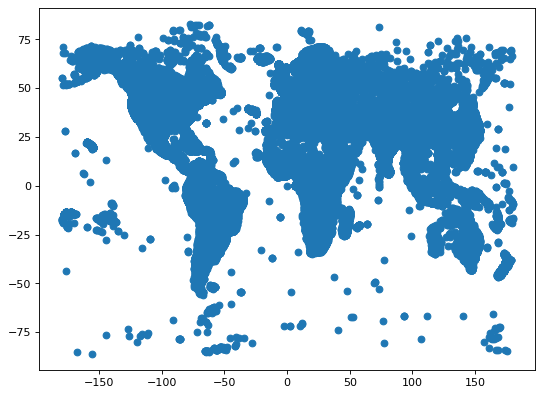

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(all_data.Longtitude,all_data.Latitude)
plt.scatter(us.Longtitude,us.Latitude)